# Fraud in retail

# Overview

Identify the fraud propensity for a retail company based on a 4K rows worth of data with 1 target variable (Fraud Instance) and 11 predictor variables.

Initial approach : fraud_dt.py

    Dataset Analysis show binary, continuous and categorical data.

    Binary data are used asis.
    Continuous data are normalized.
    Categorical data are simplified (transformed in binary).
    Train a Decision Tree model (limited to 3 level) to identify the most important features.

Initial Results :

    Accuracy of Decision Tree classifier on training set: 0.91
    Accuracy of Decision Tree classifier on test set: 0.90
    AUC on validation set: 0.9028665063372497

Top feature per importance :

    'Damaged Item'
    'Item Not Avaiable'
    'Product Care Plan'
    'Item Not In Stock'
    'Height (cms)'


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
from re import sub
from decimal import Decimal
#avoid noise
warnings.filterwarnings("ignore")

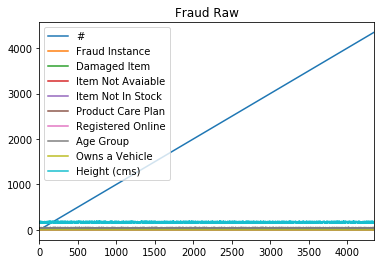

In [2]:
#Data load & normalization
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = pd.read_csv('Fraud_raw.csv')
train_data.plot(title='Fraud Raw')
plt.show()
train_data["Marital Status"][train_data["Marital Status"] == "In-Relationship"] = 1
train_data["Marital Status"][train_data["Marital Status"] == "Married"] = 1
train_data["Marital Status"][train_data["Marital Status"] == "Unmarried,"] = 0
train_data["Accomodation Type"][train_data["Accomodation Type"] == "Owns a house"] = 1
train_data["Accomodation Type"][train_data["Accomodation Type"] == "Staying with Family"] = 1
train_data["Accomodation Type"][train_data["Accomodation Type"] == "Rented"] = 0
train_data['Claim Amount'] = (train_data['Claim Amount'].replace( '[\$,)]','', regex=True).replace( '[(]','-',   regex=True ).astype(float))
train_data['Claim Amount'] = scaler.fit_transform(train_data['Claim Amount'])
train_data['Age Group'] = scaler.fit_transform(train_data['Age Group'])
train_data['Height (cms)'] = scaler.fit_transform(train_data['Height (cms)'])

In [ ]:
#print(train_data.head)

In [3]:
#splt train and test data
X_train = train_data.iloc[:,2:]
y_train = train_data.iloc[:,1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size = 0.25, random_state=0)
#train Deision tree model
clf = DecisionTreeClassifier(random_state = 0 ,max_depth = 3).fit(X_train2, y_train2)
#model score, fpr, tpr, and threshold for the validation test set
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(clf.score(X_train2, y_train2)))
probs = clf.predict(X_test2)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(clf.score(X_test2, probs)))
precision, recall, thresholds = precision_recall_curve(y_test2, probs)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]
fpr_lr, tpr_lr, _ = roc_curve(y_test2, probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

Accuracy of Decision Tree classifier on training set: 0.91
Accuracy of Decision Tree classifier on test set: 1.00


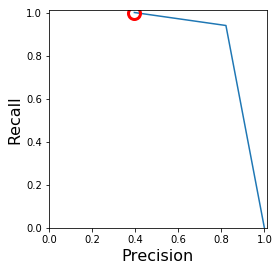

In [4]:
#Plot the Precision-recall curves
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

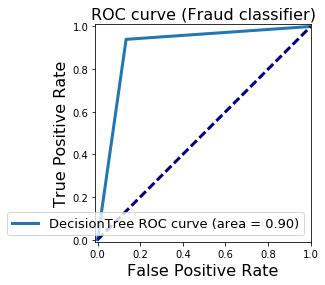

auc on validation set 0.9028665063372497


In [5]:
#Plot the ROC curve
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='DecisionTree ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (Fraud classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
print('auc on validation set {}'.format(roc_auc_lr))

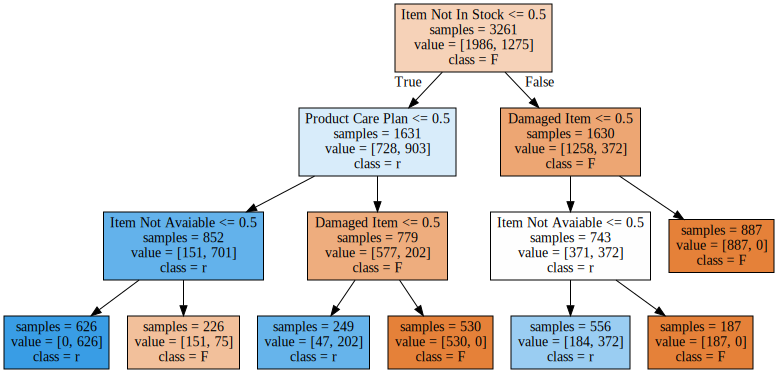

In [6]:
#Plot DecisionTree 
from adspy_shared_utilities import plot_decision_tree

plot_decision_tree(clf, X_train.columns, "Fraud")

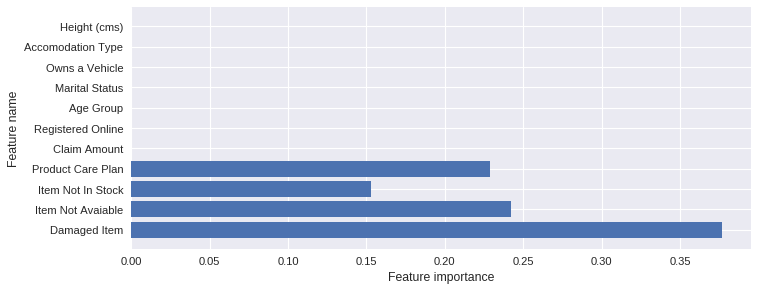

Feature importances: [ 0.37661591  0.24200638  0.1527694   0.22860831  0.          0.          0.
  0.          0.          0.          0.        ]
Top feature per importance : ['Damaged Item', 'Item Not Avaiable', 'Product Care Plan', 'Item Not In Stock', 'Height (cms)', 'Accomodation Type', 'Owns a Vehicle', 'Marital Status', 'Age Group', 'Registered Online', 'Claim Amount']


In [8]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, X_train.columns)
plt.show()

#Display feature importance
print('Feature importances: {}'.format(clf.feature_importances_))
top_feature = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False).iloc[:11].index.tolist()
print("Top feature per importance :", top_feature)